<a href="https://colab.research.google.com/github/pkmariya/Scaler01/blob/master/Delhivery_CaseStudy_Mariya_DSMLJune22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective

##### Delhivery Team wants to process the data from data engineering pipeline to,
*   get useful features out of raw fields
*   make sense out of the data to enable data science team to build forecasting models



#### Importing requied libraries

In [6]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

#### Read the Data

In [7]:
# Read the dataset
dvery_df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181")

#### Metadata of Delhivery Data

In [8]:
# Description of the dataset
dvery_df.describe(include='all')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,...,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,...,93180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,...,2018-09-24 05:19:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,...,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000


In [9]:
# Meta data of the dataset
dvery_df.info

<bound method DataFrame.info of             data          trip_creation_time  \
0       training  2018-09-20 02:35:36.476840   
1       training  2018-09-20 02:35:36.476840   
2       training  2018-09-20 02:35:36.476840   
3       training  2018-09-20 02:35:36.476840   
4       training  2018-09-20 02:35:36.476840   
...          ...                         ...   
144862  training  2018-09-20 16:24:28.436231   
144863  training  2018-09-20 16:24:28.436231   
144864  training  2018-09-20 16:24:28.436231   
144865  training  2018-09-20 16:24:28.436231   
144866  training  2018-09-20 16:24:28.436231   

                                      route_schedule_uuid route_type  \
0       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4       thanos::sroute:eb7bfc78

In [10]:
# Top 5 rows of the dataset
dvery_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [11]:
# List of columns in the dataset
dvery_df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [12]:
# Datatypes of the columns
dvery_df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [13]:
# Shape of the dataset
dvery_df.shape
print('Delhivery dataset has {} rows and {} columns'.format(dvery_df.shape[0], dvery_df.shape[1]))

Delhivery dataset has 144867 rows and 24 columns


In [14]:
# Size of the dataset
dvery_df.size

3476808

##### **Observation**: *Delhivery dataset has 1.4 lakhs plus records and 24 columns*

# Data Pre-Processing

##### 1. Check for Missing Values
##### 2. Exploring Numerical values
##### 3. Exploreing Categorical Values

In [15]:
dvery_df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [16]:
[features for features in dvery_df.columns if dvery_df[features].isnull().sum()>0]

['source_name', 'destination_name']

##### **Observation**: *Source name & Destination name have lot of null values*

In [17]:
# Take a working copy of the given dataset
work_df = dvery_df.copy()

In [18]:
work_df.size

3476808

In [19]:
work_df.shape

(144867, 24)

In [20]:
# Null values Count & Percentage
work_df.isnull().sum()
print(round(work_df.isnull().sum()/work_df.shape[0]*100,2))

data                              0.00
trip_creation_time                0.00
route_schedule_uuid               0.00
route_type                        0.00
trip_uuid                         0.00
source_center                     0.00
source_name                       0.20
destination_center                0.00
destination_name                  0.18
od_start_time                     0.00
od_end_time                       0.00
start_scan_to_end_scan            0.00
is_cutoff                         0.00
cutoff_factor                     0.00
cutoff_timestamp                  0.00
actual_distance_to_destination    0.00
actual_time                       0.00
osrm_time                         0.00
osrm_distance                     0.00
factor                            0.00
segment_actual_time               0.00
segment_osrm_time                 0.00
segment_osrm_distance             0.00
segment_factor                    0.00
dtype: float64


##### **Observation**: *Source name has 2% null value & Destination name has 0.18% null values*

In [21]:
# Total number of missing values from the entire dataset
work_df.isnull().sum().sum()

554

In [22]:
def missing_values_per_column():
  col_count = 0
  print("Columns with missing values and the missing values Percentage: \n")
  for col in work_df.columns:
    count = work_df[work_df[col].isna()].shape[0]
    if count>0:
      print(col + ' : ' + str(round((count/work_df.shape[0])*100, 2))+ '%')
      col_count = col_count + 1
  if col_count == 0:
    print("There are no missing values in any rows")
  
missing_values_per_column()

Columns with missing values and the missing values Percentage: 

source_name : 0.2%
destination_name : 0.18%


In [23]:
# Missing Values Treatment. As the % of null values are relatively low, let's drop them. 
work_df.dropna(inplace=True)

In [24]:
# Re-validating missing values post deletion
missing_values_per_column()

Columns with missing values and the missing values Percentage: 

There are no missing values in any rows


In [25]:
# Removing some of the non-significant columns
work_df.drop(columns=['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'],inplace=True)

In [26]:
# Converting few fields into right datatypes. For eg: trip_creation_time, od_start_time, od_end_time with date and time as values but have datatype as object
work_df['trip_creation_time'] = pd.to_datetime(work_df['trip_creation_time'])
work_df['od_start_time'] = pd.to_datetime(work_df['od_start_time'])
work_df['od_end_time'] = pd.to_datetime(work_df['od_end_time'])

In [27]:
work_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

In [28]:
work_df['od_time_diff'] = (work_df['od_end_time']-work_df['od_start_time']).dt.total_seconds()/60

In [29]:
# Segregating Categorical and Numerical Features
cat_features = [x for x in work_df.columns if work_df[x].dtype == 'object'] 
num_features = [y for y in work_df.columns if work_df[y].dtype not in ('object','datetime64[ns]')]

In [30]:
work_df.select_dtypes("object")

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name
0,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat)
1,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat)
2,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat)
3,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat)
4,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat)
...,...,...,...,...,...,...,...,...
144862,training,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
144863,training,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
144864,training,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
144865,training,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)


In [31]:
work_df.select_dtypes('number')

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff
0,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,86.213637
1,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,86.213637
2,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,86.213637
3,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,86.213637
4,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,86.213637
...,...,...,...,...,...,...,...,...,...
144862,427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858,427.686364
144863,427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725,427.686364
144864,427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053,427.686364
144865,427.0,73.680667,158.0,98.0,111.2709,17.0,27.0,18.8885,427.686364


In [32]:
work_df.select_dtypes('datetime')

,trip_creation_time,od_start_time,od_end_time
0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797
1,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797
2,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797
3,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797
4,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797
...,...,...,...
144862,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069
144863,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069
144864,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069
144865,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069


In [ ]:
cat_features

['data',
 'route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name',
 'Dest_Name',
 'Src_Name',
 'Trip_Creation_Time_New']

In [ ]:
num_features

['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'Duration_In_Mins']

#### Extract & Build new Features
###### Destination Name, Source Name and Trip Creation Time

In [43]:
temp_destination_name = work_df.destination_name.str.split('_')
temp_destination_name.head()

0    [Khambhat, MotvdDPP, D (Gujarat)]
1    [Khambhat, MotvdDPP, D (Gujarat)]
2    [Khambhat, MotvdDPP, D (Gujarat)]
3    [Khambhat, MotvdDPP, D (Gujarat)]
4    [Khambhat, MotvdDPP, D (Gujarat)]
Name: destination_name, dtype: object

In [33]:
# Extract Destination Name
Dest_Name = []
for name in work_df['destination_name']:
  name = str(name).split('_')
  Dest_Name.append(name[0])

In [34]:
# Add extracted destination name to the the dataset
work_df['Dest_Name'] = Dest_Name

In [35]:
# Extract Source Name
Src_Name = []
for name in work_df['source_name']:
  name = str(name).split(' (')
  Src_Name.append(name[0])

In [36]:
# Add extracted source name to the the dataset
work_df['Src_Name'] = Src_Name

In [37]:
# Extract Date Month and Year from Trip Creation Time
temp_date = []
for dateVal in work_df['trip_creation_time']:
  dt = datetime.strptime(str(dateVal), '%Y-%m-%d %H:%M:%S.%f')
  temp_date.append(str(dt.day) + ' ' + str(dt.month) + ' ' + str(dt.year))

In [38]:
# Add extracted day, month and year to the dataset
work_df['Trip_Creation_Time_New'] = temp_date

In [39]:
# Verifying the newly added features
work_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff,Dest_Name,Src_Name,Trip_Creation_Time_New
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,14.0,11.0,11.9653,86.213637,Khambhat,Anand_VUNagar_DC,20 9 2018
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,24.0,20.0,21.7243,10.0,9.0,9.7590,86.213637,Khambhat,Anand_VUNagar_DC,20 9 2018
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,40.0,28.0,32.5395,16.0,7.0,10.8152,86.213637,Khambhat,Anand_VUNagar_DC,20 9 2018
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,62.0,40.0,45.5620,21.0,12.0,13.0224,86.213637,Khambhat,Anand_VUNagar_DC,20 9 2018
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,68.0,44.0,54.2181,6.0,5.0,3.9153,86.213637,Khambhat,Anand_VUNagar_DC,20 9 2018


In [40]:
start_date = datetime.strptime(work_df['od_start_time'][0], '%Y-%m-%d %H:%M:%S.%f')
end_date = datetime.strptime(work_df['od_end_time'][0], '%Y-%m-%d %H:%M:%S.%f')
duration = abs((end_date - start_date).total_seconds())
duration_in_mins = round(duration/60)
print(duration_in_mins)

TypeError: ignored

In [ ]:
# Find the Start to End duration and add to the dataset
duration_in_mins = []
for i in range(len(work_df)):
  start_date = datetime.strptime(work_df['od_start_time'][i], '%Y-%m-%d %H:%M:%S.%f')
  end_date = datetime.strptime(work_df['od_end_time'][i], '%Y-%m-%d %H:%M:%S.%f')
  duration = abs((end_date - start_date).total_seconds())
  duration_in_mins.append(round(duration/60))

In [ ]:
work_df['Duration_In_Mins'] = duration_in_mins

In [ ]:
# Numerical features analysis
work_df.describe().T

### Insights 

Averages:
*   Avg Time "start_scan_to_end_scan" is: 964 mins
*   Avg distance to destination is: 234 kms warehouse 
*   Avg actual time 418 mins
*   Avg osrm_time 214 mins
*   Avg osrm_distance 285 kms
*   Avg segment_actual_time 36 mins
*   Avg segment_osrm_time is 18 mins
*   Avg segment_osrm_distance is 22 kms
*   Avg duration in mins is 964

In [ ]:
work_df.describe(include='object').T

,count,unique,top,freq
data,144316,2,training,104632
route_schedule_uuid,144316,1497,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
route_type,144316,2,FTL,99132
trip_uuid,144316,14787,trip-153837029526866991,101
source_center,144316,1496,IND000000ACB,23267
source_name,144316,1496,Gurgaon_Bilaspur_HB (Haryana),23267
destination_center,144316,1466,IND000000ACB,15192
destination_name,144316,1466,Gurgaon_Bilaspur_HB (Haryana),15192
Dest_Name,144316,1256,Gurgaon,15393
Src_Name,144316,1496,Gurgaon_Bilaspur_HB,23267


In [ ]:
work_df['route_type'].value_counts()

FTL        99132
Carting    45184
Name: route_type, dtype: int64

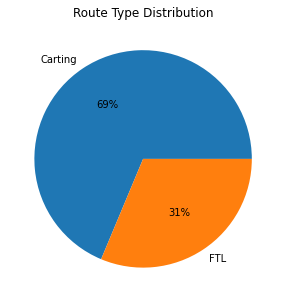

In [ ]:
plt.figure(figsize=(15,5))
plt.pie(work_df['route_type'].value_counts(),labels=['Carting','FTL'], autopct='%.0f%%')
plt.title('Route Type Distribution')
plt.show()

##### Of the 2 route types, 'FTL' seems to be more frequent with high numbers
##### Gurgaon-Bilaspur-HB tops in terms of Source City and Gurgaon city seems to be the popular destination with high numers

In [ ]:
for feature in num_features:
  print(work_df[feature].value_counts())

4.700480    459
4.276666    424
4.595120    411
4.553877    405
4.454347    399
           ... 
7.255591      1
7.903227      1
7.061334      1
6.807935      1
7.239215      1
Name: start_scan_to_end_scan, Length: 1914, dtype: int64
4.621891    2
5.275857    2
3.593579    2
3.784835    2
3.091431    2
           ..
4.892528    1
4.702401    1
4.487882    1
4.195196    1
4.249052    1
Name: actual_distance_to_destination, Length: 143965, dtype: int64
3.465736    1440
3.583519    1413
3.401197    1345
3.637586    1322
3.737670    1236
            ... 
8.058960       1
8.024535       1
7.885329       1
7.977282       1
7.999679       1
Name: actual_time, Length: 3182, dtype: int64
3.044522    2392
2.995732    2354
2.890372    2245
3.091042    2133
2.833213    2089
            ... 
7.352441       1
7.386471       1
7.029973       1
7.130899       1
7.179308       1
Name: osrm_time, Length: 1531, dtype: int64
3.872022    11
2.418589     5
2.752475     4
5.511345     4
3.257989     4
       

<Figure size 1440x1080 with 0 Axes>

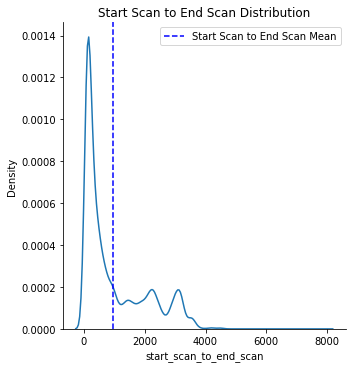

In [ ]:
# Comparision & Visulization of distance fields
plt.figure(figsize = (20,15))
sns.displot(work_df['start_scan_to_end_scan'],kind='kde')
plt.axvline(x = work_df['start_scan_to_end_scan'].mean(), color = 'b',linestyle='--',label = 'Start Scan to End Scan Mean')
plt.title('Start Scan to End Scan Distribution')
plt.legend()
plt.show()

<Figure size 1440x1080 with 0 Axes>

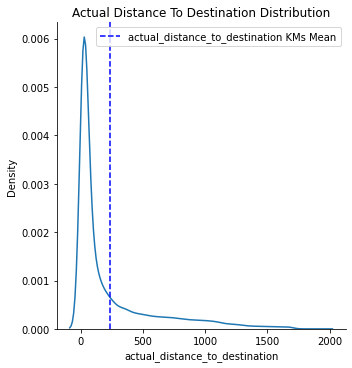

In [ ]:
plt.figure(figsize = (20,15))
sns.displot(work_df['actual_distance_to_destination'],kind='kde')
plt.axvline(x = work_df['actual_distance_to_destination'].mean(), color = 'b',linestyle='--',label = 'actual_distance_to_destination KMs Mean')
plt.title('Actual Distance To Destination Distribution')
plt.legend()
plt.show()

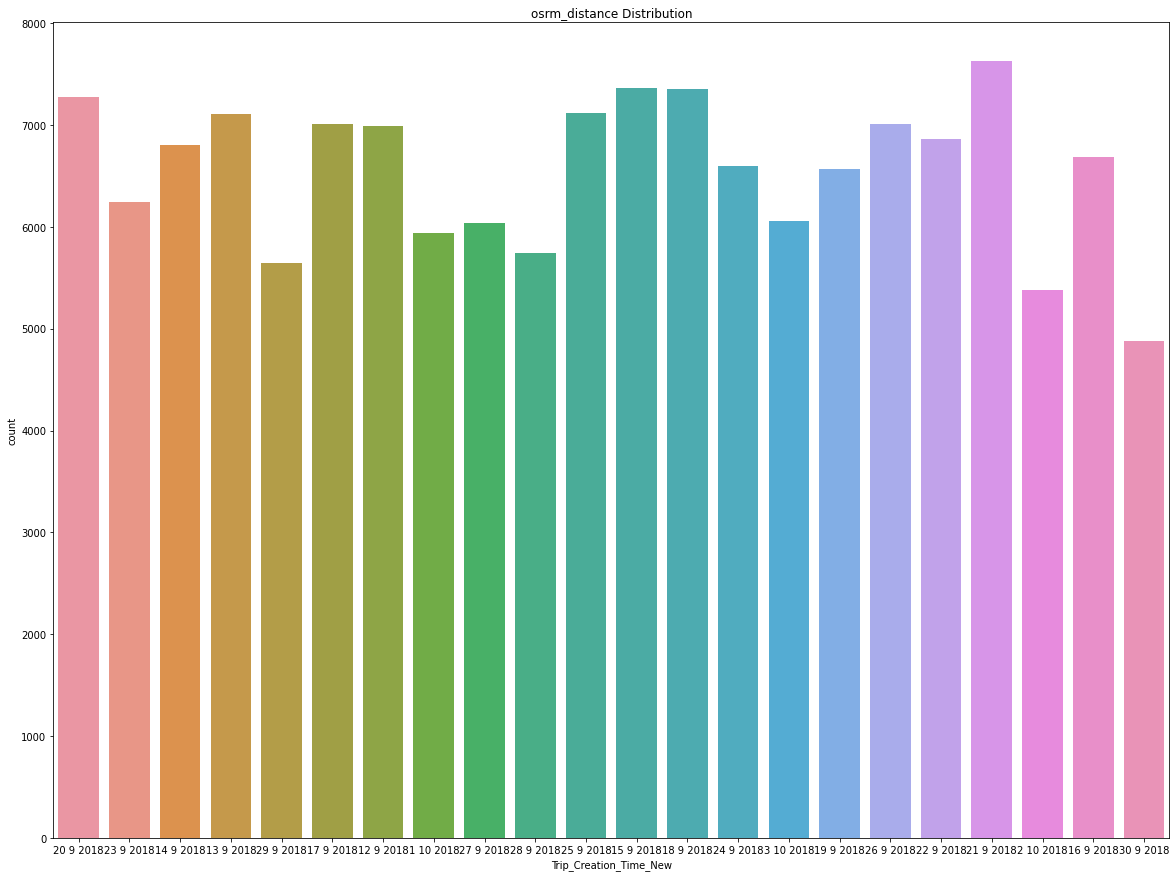

In [ ]:
plt.figure(figsize = (20,15))
sns.countplot(data= work_df, x = 'Trip_Creation_Time_New')
plt.title('osrm_distance Distribution')
plt.show()

#### This indicates, the trip creation time follows a normal distribution with more or less constant time across dates

In [ ]:
busy_route_df = work_df.groupby(['trip_uuid','source_center','destination_center']).count().reset_index()

In [ ]:
busy_route_df['route_schedule_uuid'].max()

81

####################################################################################################
Outlier for start_scan_to_end_scan: 
3871.0




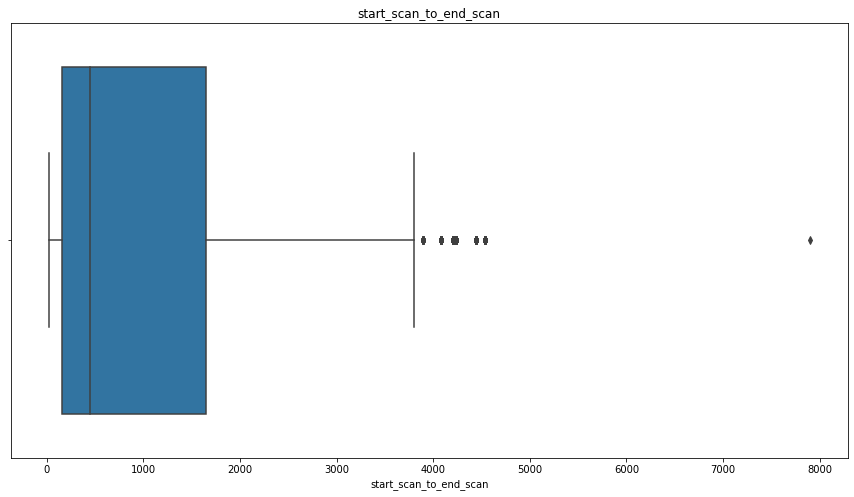

####################################################################################################
Outlier for actual_distance_to_destination: 
682.2701940854843




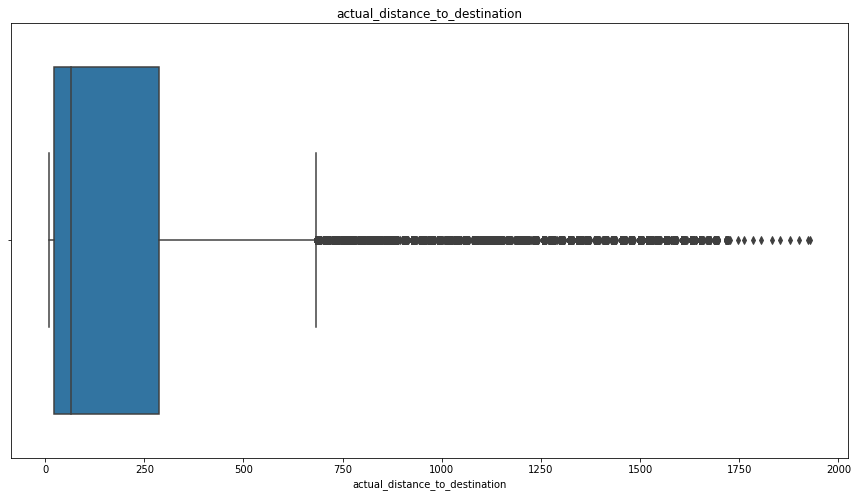

####################################################################################################
Outlier for actual_time: 
1213.5




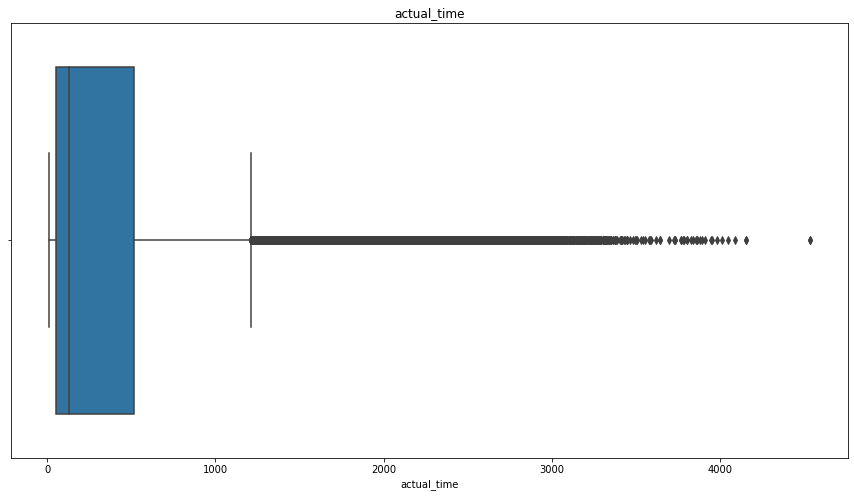

####################################################################################################
Outlier for osrm_time: 
607.0




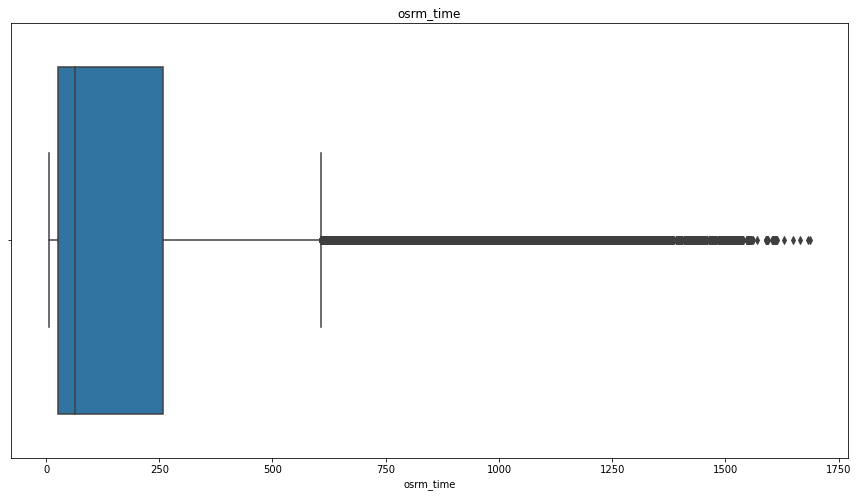

####################################################################################################
Outlier for osrm_distance: 
820.9191250000001




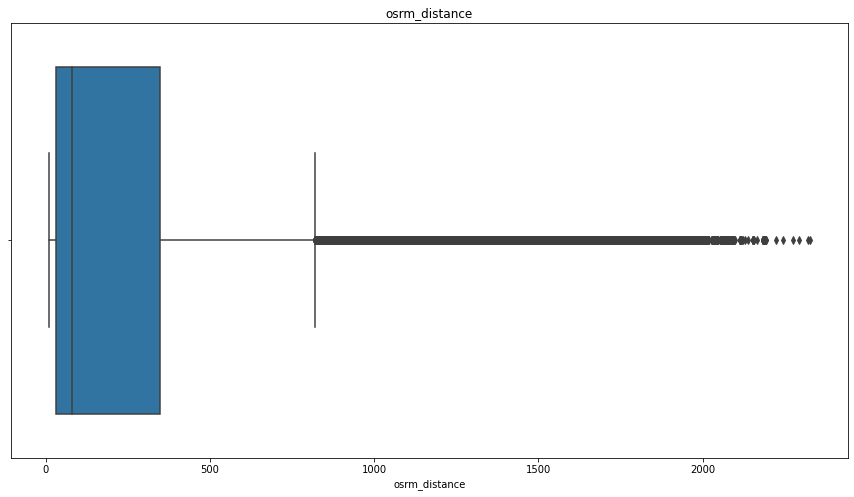

####################################################################################################
Outlier for segment_actual_time: 
70.0




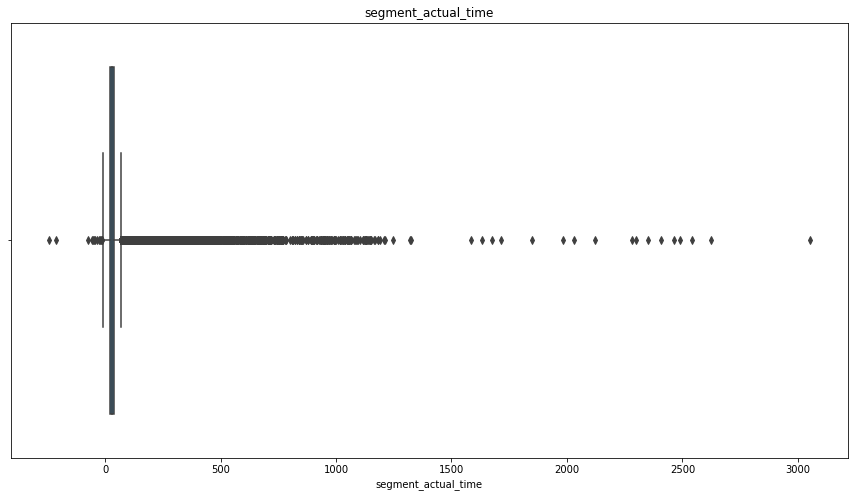

####################################################################################################
Outlier for segment_osrm_time: 
38.5




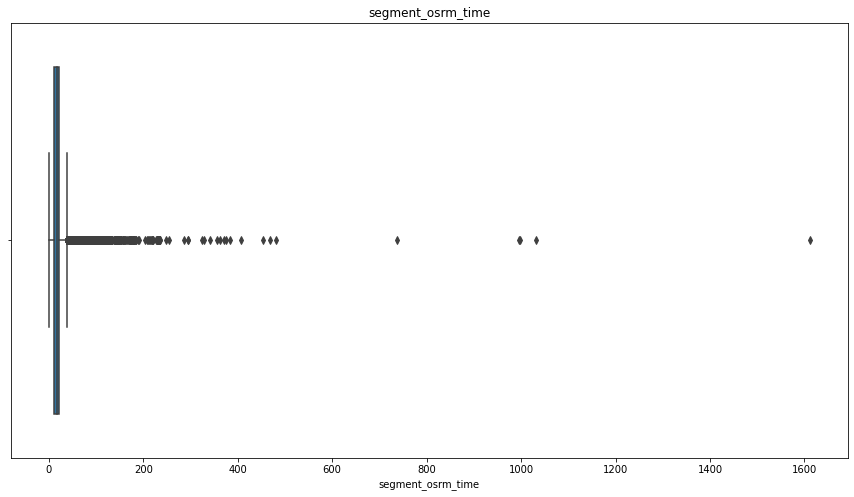

####################################################################################################
Outlier for segment_osrm_distance: 
51.45235000000001




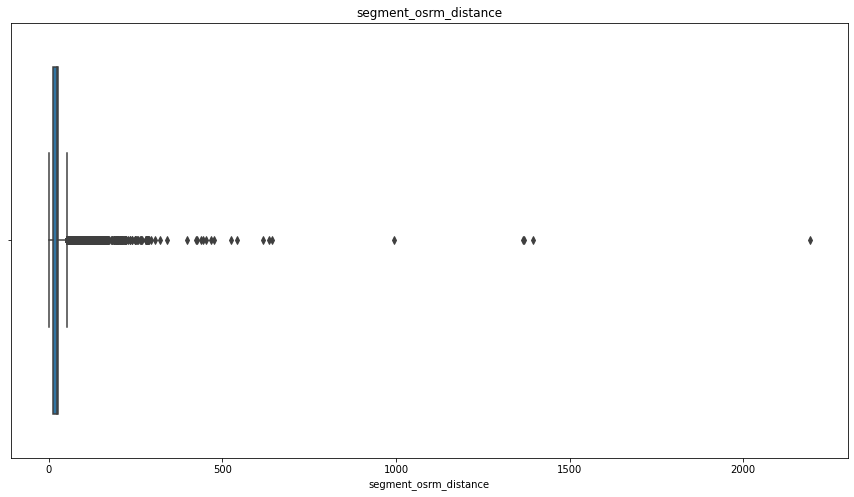

####################################################################################################
Outlier for Duration_In_Mins: 
3871.0




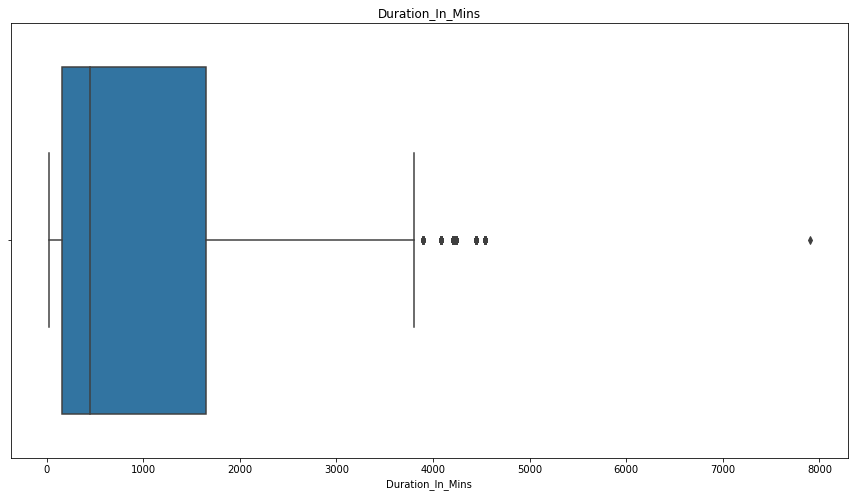

In [ ]:
# Outliers of Numerical Features
for feature in num_features:
 plt.figure(figsize = (15,8))
 sns.boxplot(work_df[feature])
 print('#'*100)
 print(f'Outlier for {feature}: ')
 print(np.percentile(work_df[feature],75) + 1.5 * (np.percentile(work_df[feature],75) - np.percentile(work_df[feature],25)))
 print('\n')

 plt.title(feature)
 plt.show()

In [ ]:
# Applying the log as there are outliers
for i in num_features:
  work_df[i] = np.log(work_df[i])

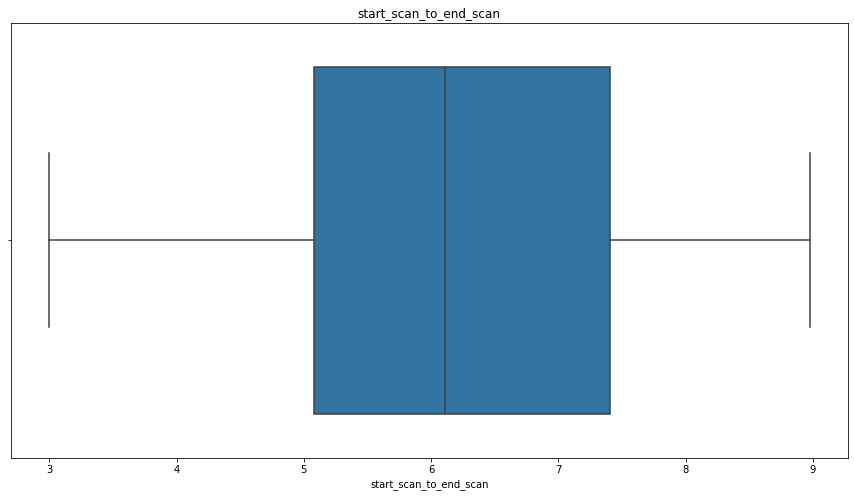

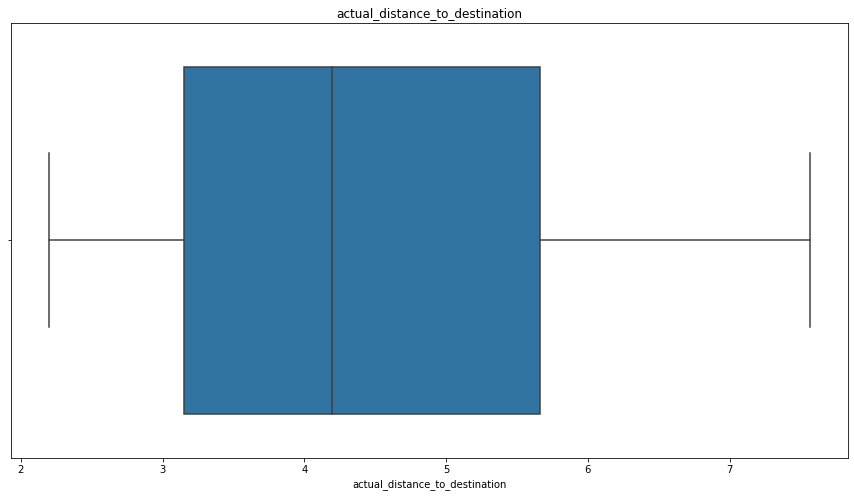

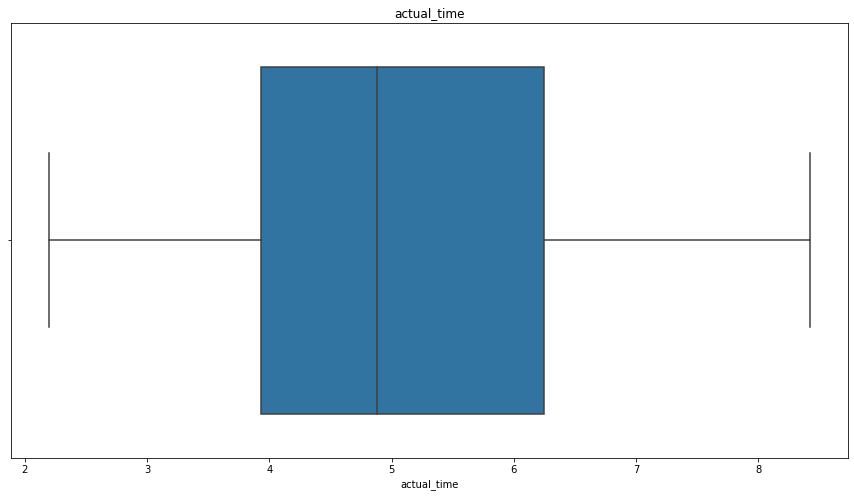

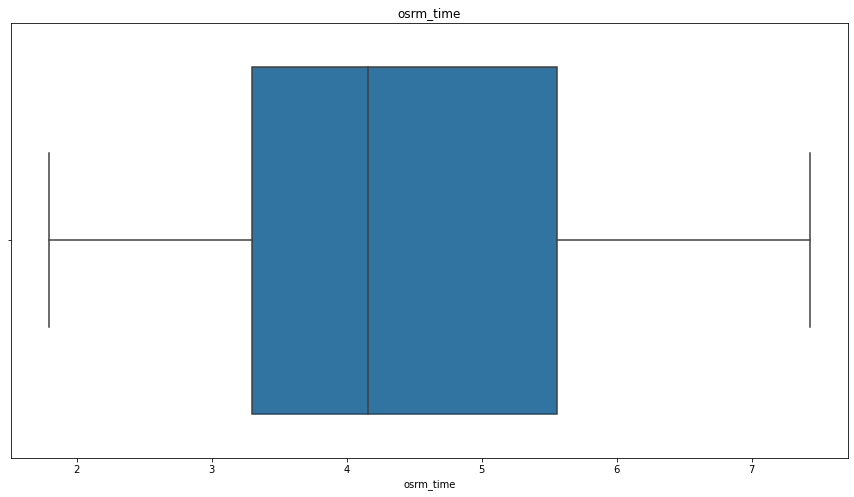

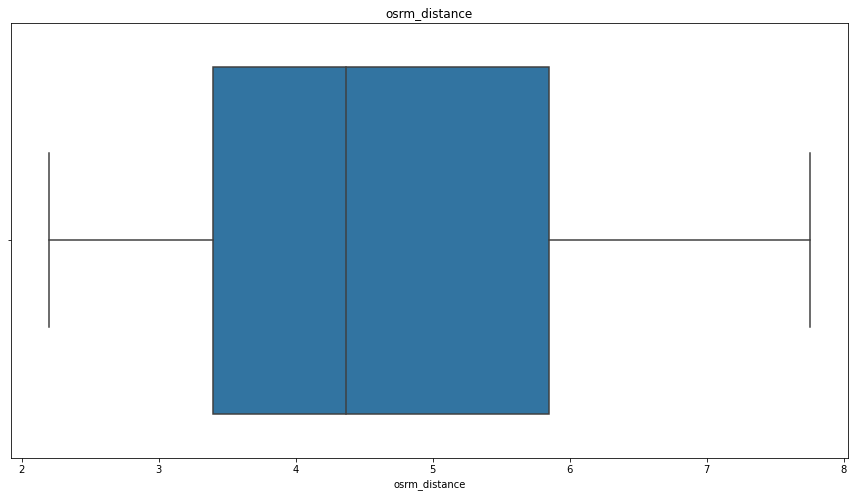

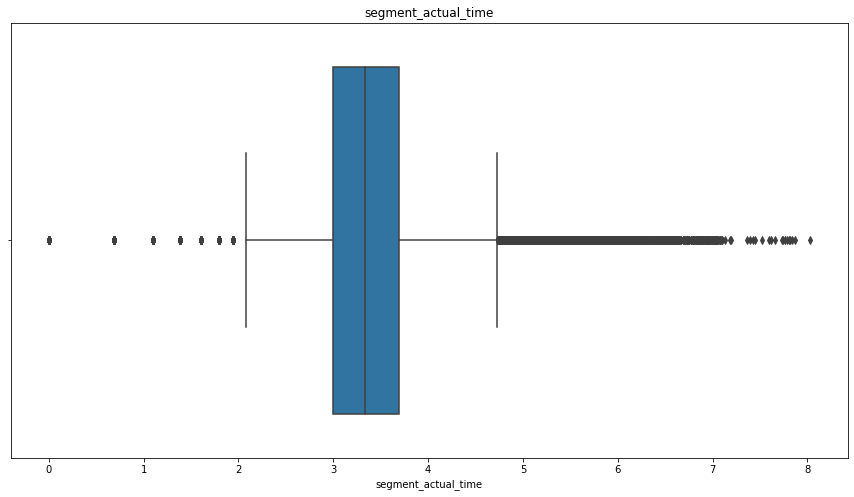

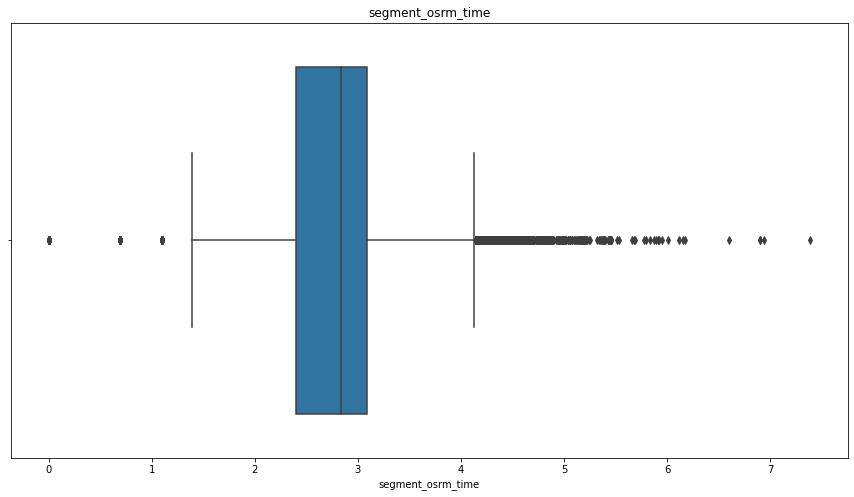

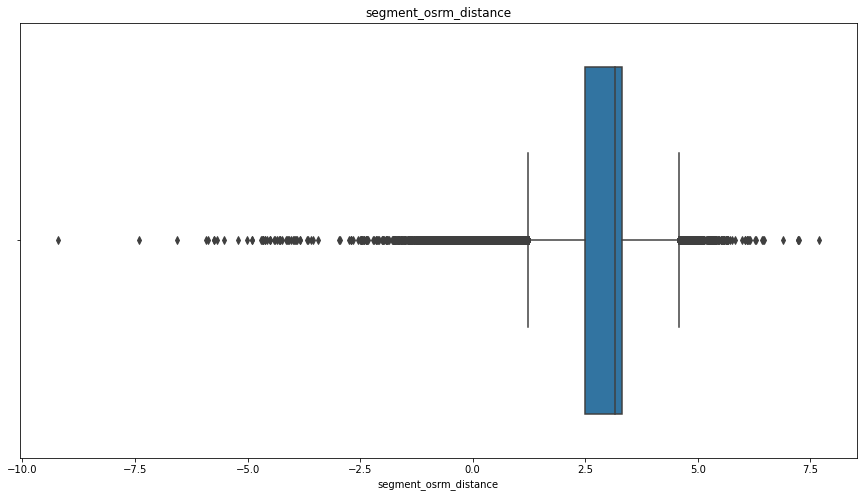

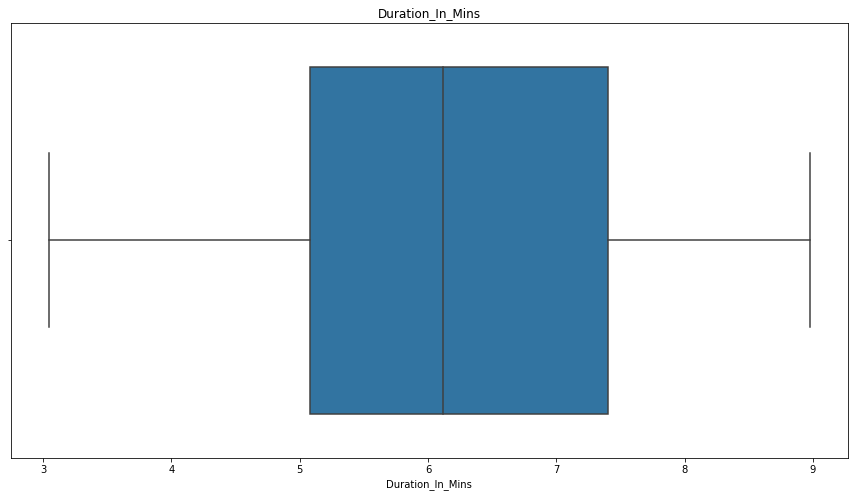

In [ ]:
for i in num_features:
  plt.figure(figsize=(15,8))
  sns.boxplot(work_df[i])
  plt.title(i)
  plt.show()

<Figure size 1440x1080 with 0 Axes>

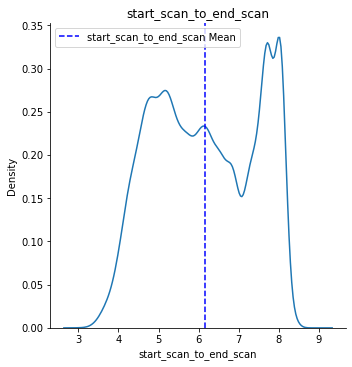

<Figure size 1440x1080 with 0 Axes>

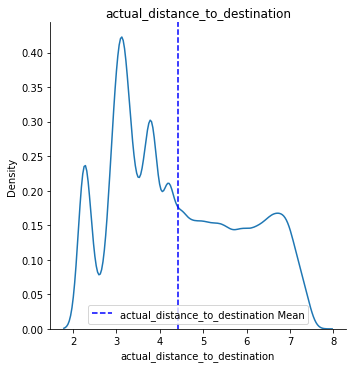

<Figure size 1440x1080 with 0 Axes>

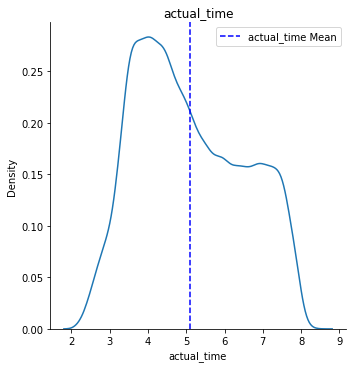

<Figure size 1440x1080 with 0 Axes>

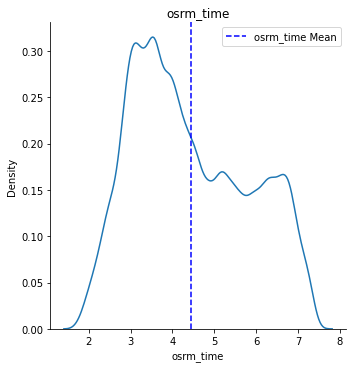

<Figure size 1440x1080 with 0 Axes>

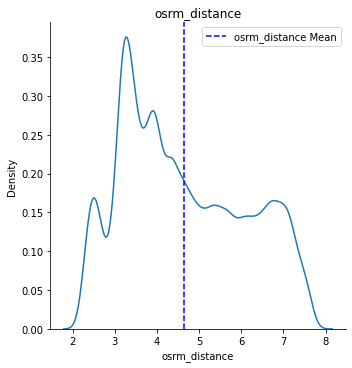

<Figure size 1440x1080 with 0 Axes>

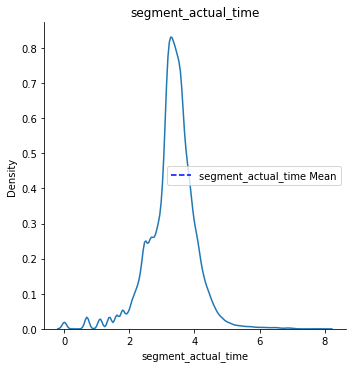

<Figure size 1440x1080 with 0 Axes>

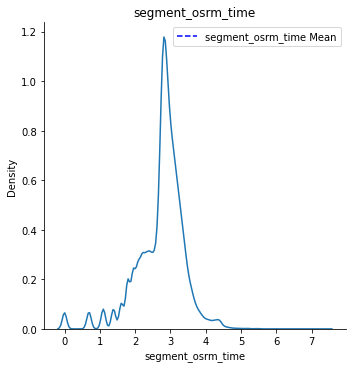

<Figure size 1440x1080 with 0 Axes>

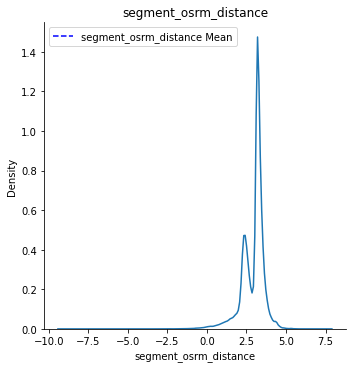

<Figure size 1440x1080 with 0 Axes>

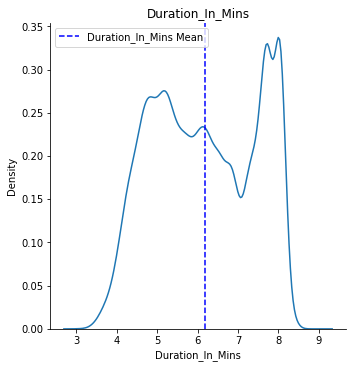

In [ ]:
for i in num_features:
 plt.figure(figsize = (20,15))
 sns.displot(work_df[i],kind='kde')
 plt.axvline(x = work_df[i].mean(), color = 'b',linestyle='--',label = f'{i} Mean')
 plt.title(i)
 plt.legend()
 plt.show()

<Figure size 1440x1080 with 0 Axes>

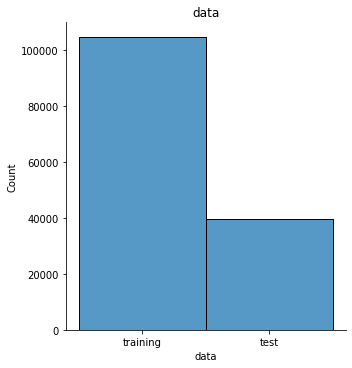

<Figure size 1440x1080 with 0 Axes>

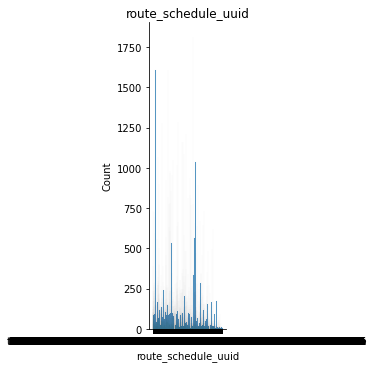

<Figure size 1440x1080 with 0 Axes>

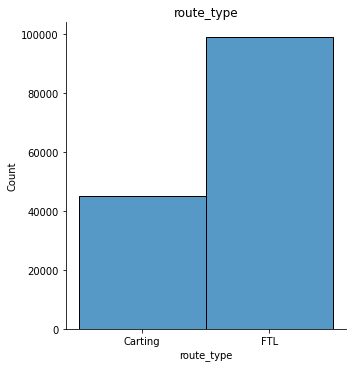

<Figure size 1440x1080 with 0 Axes>

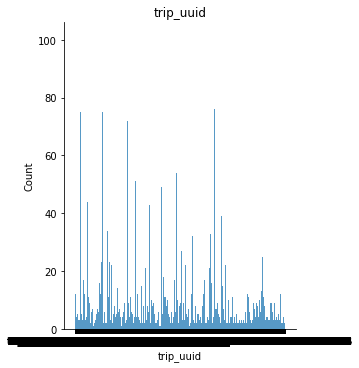

<Figure size 1440x1080 with 0 Axes>

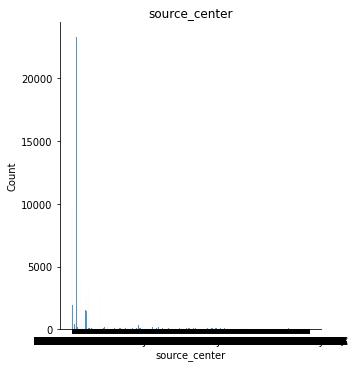

<Figure size 1440x1080 with 0 Axes>

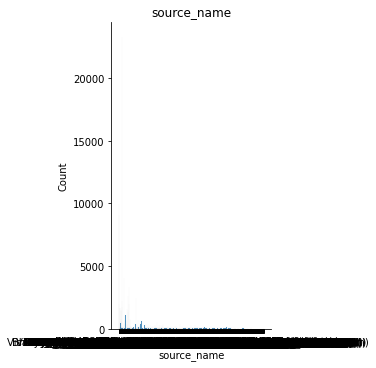

<Figure size 1440x1080 with 0 Axes>

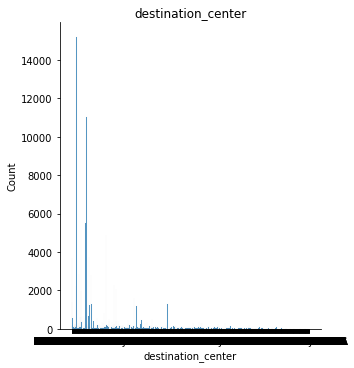

<Figure size 1440x1080 with 0 Axes>

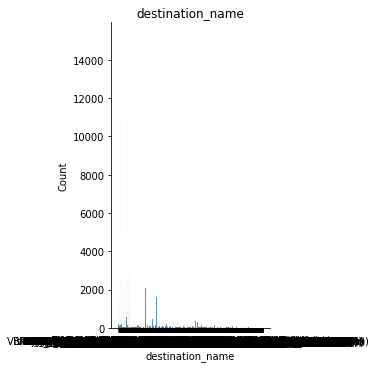

<Figure size 1440x1080 with 0 Axes>

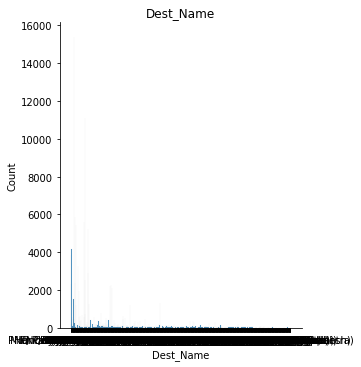

<Figure size 1440x1080 with 0 Axes>

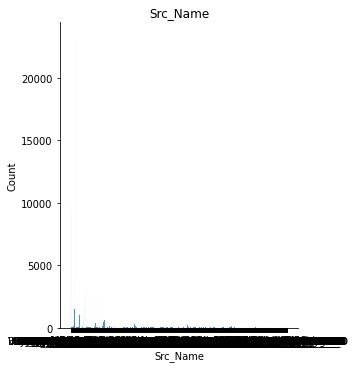

<Figure size 1440x1080 with 0 Axes>

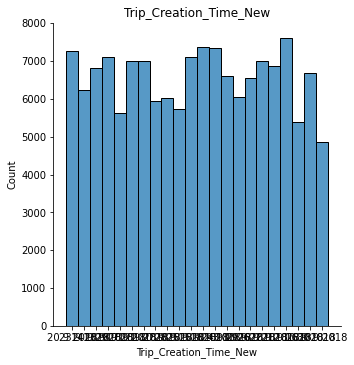

In [ ]:
# Bi-variate analysis of Categorical Features
for i in cat_features:
 plt.figure(figsize = (20,15))
 sns.displot(data=work_df,x = i)
 plt.title(i)

 plt.show()

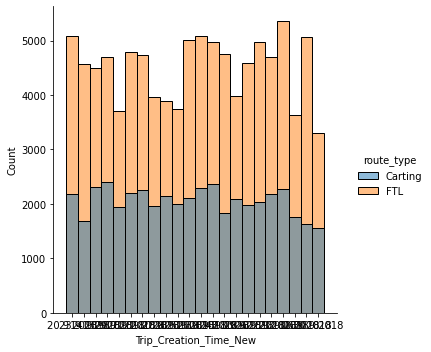

In [ ]:
sns.displot(data=work_df, x = od_time_diff, hue='route_type')

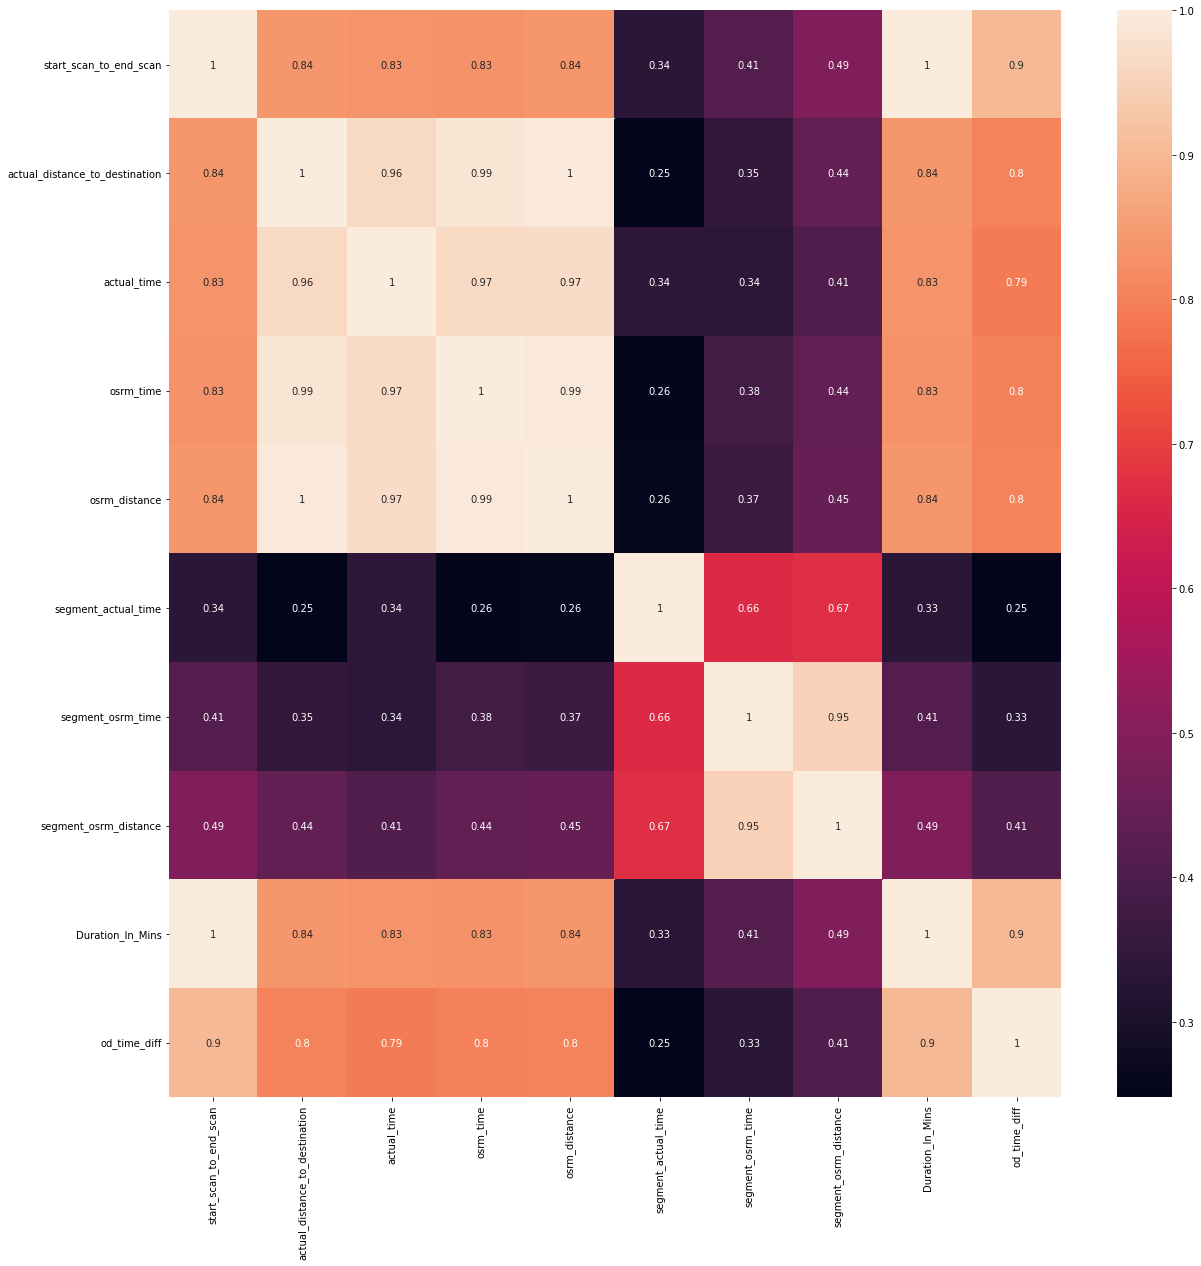

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(work_df.corr(), annot=True)
plt.show()

### Relationship Analysis and Hypothesis Testing

###### Compare the difference between Point a. and start_scan_to_end_scan

Ho: Mean OD start and end time difference = Start to End Scan mean
H1: Mean OD start and end time difference != Start to End Scan mean

In [ ]:
print(f"OD Start and End Time Difference: {shapiro(work_df['od_time_diff'])}")
print(f"start_scan_to_end_scan: {shapiro(work_df['start_scan_to_end_scan'])}")

OD Start and End Time Difference: ShapiroResult(statistic=0.8055524826049805, pvalue=0.0)
start_scan_to_end_scan: ShapiroResult(statistic=0.9491842985153198, pvalue=0.0)


##### Based on the p-value, we can fail to accept the Ho

In [ ]:
stats.kruskal(work_df['od_time_diff'],work_df['start_scan_to_end_scan'])

KruskalResult(statistic=216473.29548925217, pvalue=0.0)

##### Kruskal test too affirms our above observation

##### Do hypothesis testing/ visual analysis between actual_time and OSRM time 

Ho: Mean Actual time = osrm mean
H1: Mean Actual time != osrm mean 

In [ ]:
print(f"Actual time distribution: {shapiro(work_df['actual_time'])}")
print(f"osrm time distribution: {shapiro(work_df['osrm_time'])}")

For actual_time distribution: ShapiroResult(statistic=0.9633338451385498, pvalue=0.0)
For osrm_time distribution: ShapiroResult(statistic=0.9560200572013855, pvalue=0.0)


In [ ]:
stats.kruskal(work_df['actual_time'],work_df['osrm_time'])

KruskalResult(statistic=15256.749500511552, pvalue=0.0)

### Observations

*   FTL form of delivery is the highest as compared to Carting
*   Gurgaon is the top source and incidently which is also the top destination
*   In terms of start_to_end_scan FTL takes less time as against Carting
*   On distance covered, Carting has less distance as compared to FTL
*   OD start and end time doesn't show huge difference
*   But, actual time and osrm time has significant difference



# Summary

Some key recommendations based on the analysis and Observations would be,  

*   Delhivery can start to increase number of sub hubs between the long distance hubs to shorten the delivery time especially in high traffic zones
*   There are few regions where Delhivery can increase their presence to tap and increase their stake in that market